In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [14]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,20452,None,None,88656.146970
2020-06-13,20453,None,None,81935.302350
2020-06-14,20454,None,None,75746.207993
2020-06-15,20455,None,None,70089.751525
2020-06-16,20456,None,None,65140.963282
...,...,...,...,...
2020-12-25,20648,None,None,466384.874440
2020-12-26,20649,None,None,491234.365832
2020-12-27,20650,None,None,515988.422667


In [15]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2020-12-29_2020-12-29-16-40.pickle


In [16]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2020-12-25_2020-12-28-17-45.pickle


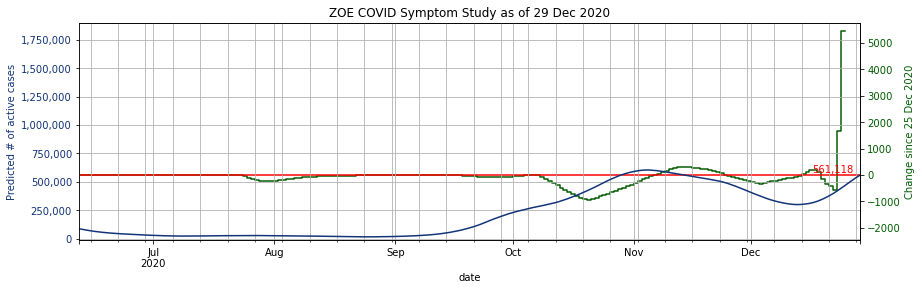

In [17]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

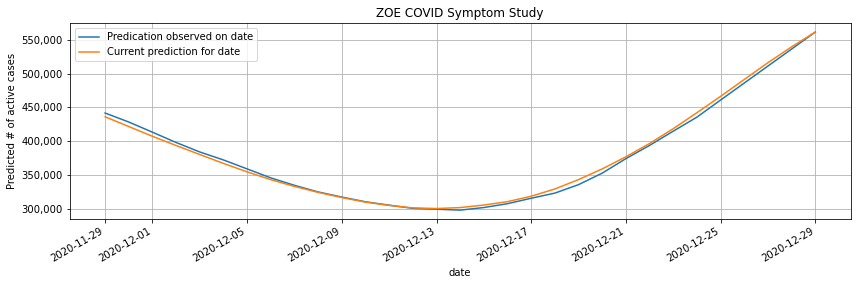

In [18]:
plot_study_evolution(curr_date, days=30)

In [19]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [20]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2020-12-29_2020-12-29-16-40.pickle


In [21]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
384,Torfaen,W06000020,4.963095
343,Vale of Glamorgan,W06000014,4.745813
386,Newport,W06000022,4.573141
342,Bridgend,W06000013,3.896356
329,Denbighshire,W06000004,3.447667
333,Flintshire,W06000005,3.132939
339,Swansea,W06000011,3.059278
382,Caerphilly,W06000018,2.879375
312,Bexley,E09000004,2.767138
370,Redbridge,E09000026,2.704764
